In [1]:
import os
import numpy as np
import networkx as nx
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm

In [2]:
from Weighted_KShell_Decomposition import wkshell_decomposition

In [3]:
import warnings
warnings.filterwarnings('ignore')

['bus_stops_wszone.dbf', 'bus_stops_wszone.shp', 'net_202001_15.net', 'OD_bus', 'net_202001_05.net', 'net_202001_06.net', 'origin_destination_train_201912.csv.xz', 'train_station_wszone.prj', 'origin_destination_train_202001.csv.xz', 'train_station_wszone.dbf', 'OD_202001_weekend.csv.xz', 'net_202001_22.net', 'subzone_centroid.csv', 'OD_201912_weekday.csv.xz', 'origin_destination_bus_201911.csv.xz', 'net_202001_19.net', 'net_202001_18.net', 'train_station_wszone.cpg', 'OD_PT', 'train_station_wszone.shx', 'net_202001_10.net', 'OD_201911_weekend.csv.xz', 'origin_destination_train_201911.csv.xz', 'net_202001_weekend.net', 'subzone_centroid_pos.json', '.ipynb_checkpoints', 'net_202001_21.net', 'origin_destination_bus_202001.csv.xz', 'OD_201912_weekend.csv.xz', 'net_202001_07.net', 'origin_destination_bus_201912.csv.xz', 'net_202001_23.net', 'region-2014', 'train_station_wszone.shp', 'net_202001_weekday.net', 'net_202001_16.net', 'OD_train', 'bus_stops_wszone.shx', 'OD_202001_weekday.csv.xz

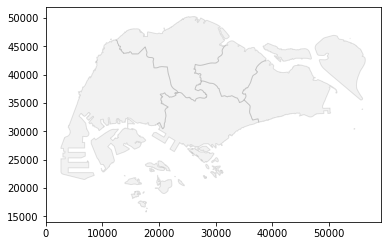

In [4]:
data_dir = "../data"
print(os.listdir(data_dir))

#os.listdir("../data")
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [5]:
with open(os.path.join("../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

In [6]:
day = "weekday" # "weekend"
fp = os.path.join(data_dir, "net_202001_{}.net".format(day))
dg1 = nx.read_pajek(fp)
dg1.number_of_nodes(), dg1.number_of_edges()

(303, 30043)

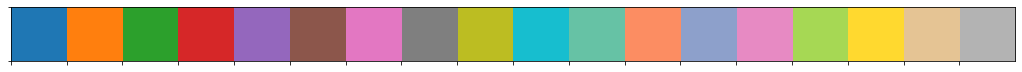

In [12]:
current_palette = sns.color_palette() + sns.color_palette("Set2")
#current_palette = sns.color_palette("Set2")#, 14)
sns.palplot(current_palette)

In [7]:
f = "net_202001_weekday.csv"
df_res = pd.read_csv(os.path.join("../", "mapequation", f), index_col=0)
df_res.head()

,clusters,flow,node,ori_index,level_1,level_2
ind,,,,,,
0,1:1,0.023149,TAMPINES EAST,40,1,1_1
1,1:2,0.017636,BEDOK NORTH,16,1,1_2
2,1:3,0.013683,TOA PAYOH CENTRAL,68,1,1_3
3,1:4,0.013282,ALJUNIED,21,1,1_4
4,1:5,0.012734,TAMPINES WEST,78,1,1_5


In [8]:
nets1 = []
for i in sorted(list(set(df_res["level_1"].tolist()))):
    temp = df_res[df_res["level_1"]==i]
    ns = temp["node"].tolist()
    sub_net = dg1.subgraph(ns)
    nets1.append(sub_net)


100%|██████████| 6/6 [00:00<00:00, 6083.11it/s]


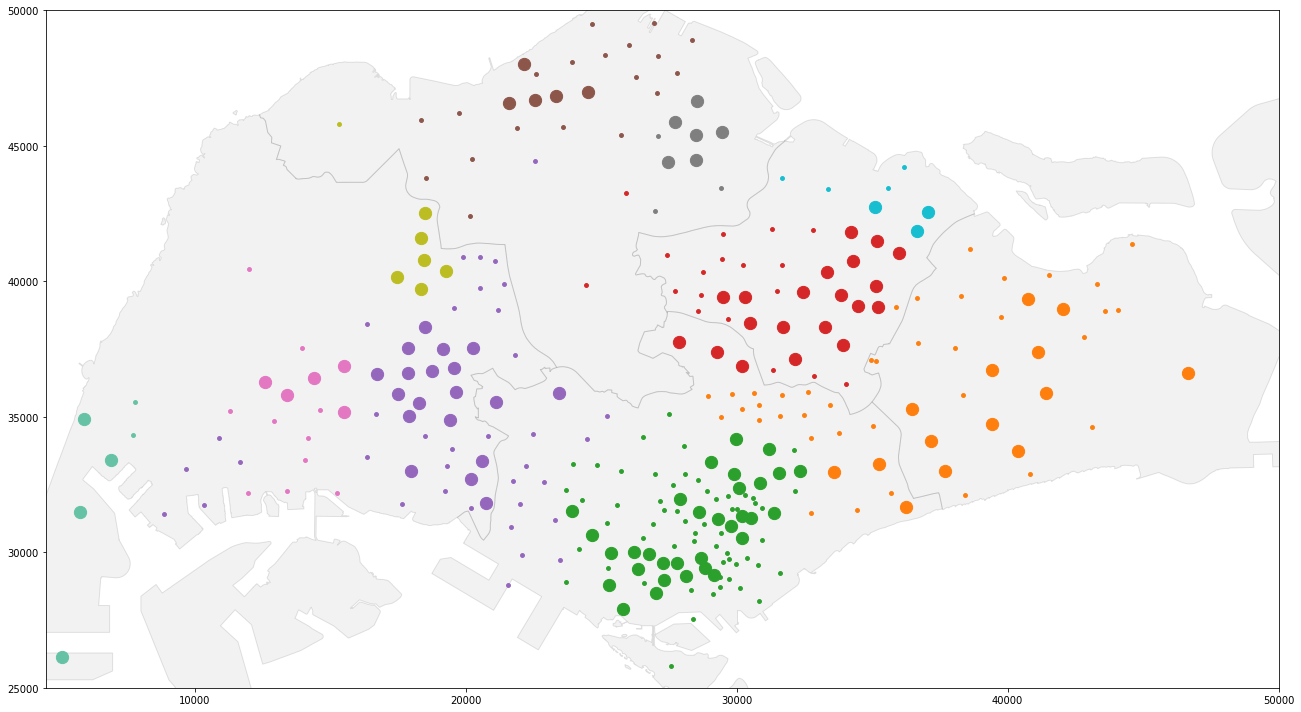

In [20]:

fig, ax = plt.subplots(figsize=(20,10))
ax.set_aspect("equal")

color_i = 1
for dgb in nets1:
    node_ks = wkshell_decomposition(dgb.copy(), direction="in", alpha=1., beta=1., filter_edge_weight=1000, group_k_by=1, normalize_edges_by_median=True)
    #sns.distplot(list(node_ks.values()), kde=False)
    max_val = max(list(node_ks.values()))
    #max_nodes = [ n for n,v in node_ks.items() if v==max_val ]
    #print(max_nodes)
    color = current_palette[color_i]
    
    nx.draw_networkx_nodes(dgb, nodelist=[ n for n,v in node_ks.items() if v>=max_val ], pos=pos, node_size=150, node_color=[color])
    nx.draw_networkx_nodes(dgb, nodelist=[ n for n,v in node_ks.items() if v<max_val ], pos=pos, node_size=15, node_color=[color])
    
    color_i+=1
    #break
    

region.plot(color="grey", edgecolor="k", alpha=0.1, ax=ax)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()